In [117]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:

# Load your data from CSV file (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('species.csv')


C:\Users\am737\AppData\Local\Temp\ipykernel_13532\3053673837.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('species.csv')


In [119]:
data.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [120]:
data.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status',
       'Unnamed: 13'],
      dtype='object')

In [121]:

# Select relevant columns for analysis (optional)
relevant_columns = ['Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Occurrence',
       'Nativeness', 'Conservation Status']
data = data[relevant_columns]


In [122]:

# Handle missing values (optional)
# You can replace with other methods like filling with mode or median
data.replace('Unknown', np.nan, inplace=True)
data.dropna(inplace=True)


In [123]:

# Encode categorical data using one-hot encoding
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(data.values)


In [124]:
# Convert encoded_data to a pandas DataFrame
data_df = pd.DataFrame(encoded_data, columns=encoder.columns_)


In [125]:
# Define minimum support threshold (adjust as needed)
min_support = 0.5


# Apriori Algorithm

In [126]:
# Frequent itemset generation
frequent_itemsets_apriori = apriori(data_df, min_support=min_support, use_colnames=True)

In [127]:

# Print frequent itemsets
print("Frequent Itemsets (Apriori):")
print(frequent_itemsets_apriori)


Frequent Itemsets (Apriori):
     support                               itemsets
0   0.602730                                 (Bird)
1   0.972701                               (Native)
2   0.834052                              (Present)
3   0.832136                   (Species of Concern)
4   0.586207                         (Bird, Native)
5   0.530172                        (Bird, Present)
6   0.545498             (Bird, Species of Concern)
7   0.817050                      (Present, Native)
8   0.814655           (Native, Species of Concern)
9   0.716236          (Present, Species of Concern)
10  0.519875                (Bird, Present, Native)
11  0.533046     (Bird, Native, Species of Concern)
12  0.705220  (Present, Native, Species of Concern)


In [128]:
# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.7)

# Print association rules
print("Association Rules (Apriori):")
print(rules_apriori)

Association Rules (Apriori):
                      antecedents                    consequents  \
0                          (Bird)                       (Native)   
1                          (Bird)                      (Present)   
2                          (Bird)           (Species of Concern)   
3                       (Present)                       (Native)   
4                        (Native)                      (Present)   
5                        (Native)           (Species of Concern)   
6            (Species of Concern)                       (Native)   
7                       (Present)           (Species of Concern)   
8            (Species of Concern)                      (Present)   
9                 (Bird, Present)                       (Native)   
10                 (Bird, Native)                      (Present)   
11                         (Bird)              (Present, Native)   
12                 (Bird, Native)           (Species of Concern)   
13     (Bird, Speci

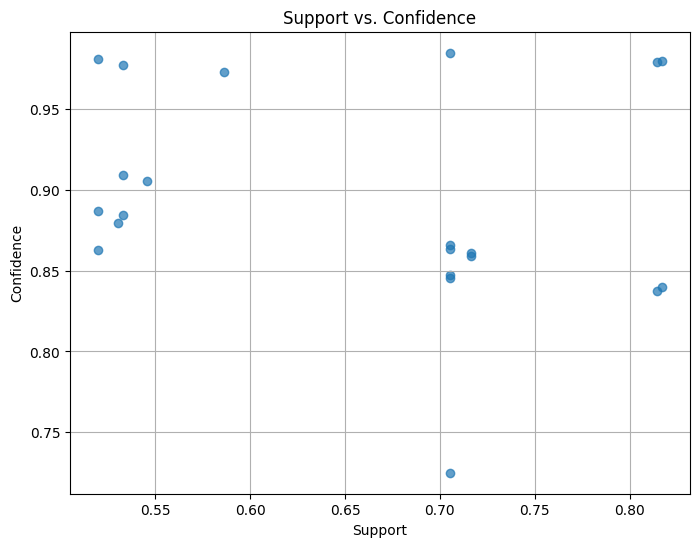

In [129]:
# Extract support and confidence values from the rules
supports = rules_apriori['support'].tolist()
confidences = rules_apriori['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()


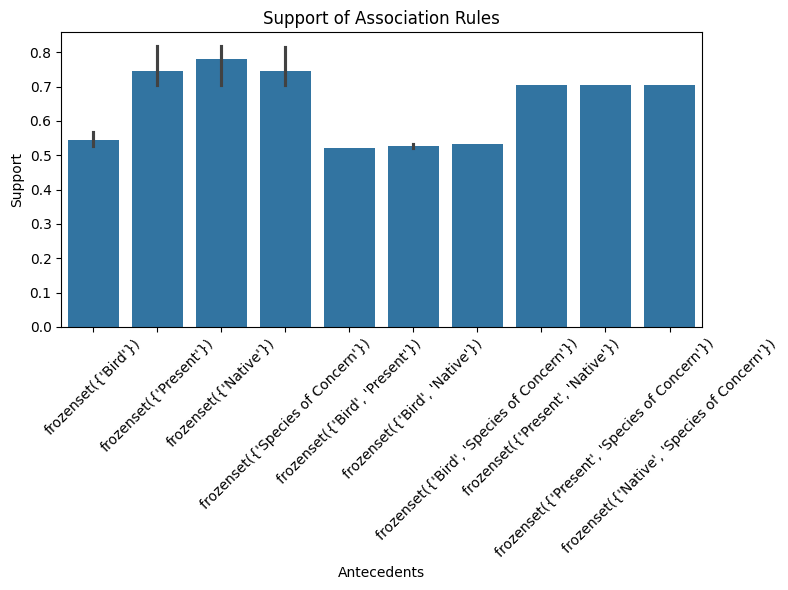

In [130]:

# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=rules_apriori.antecedents, y=supports)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()


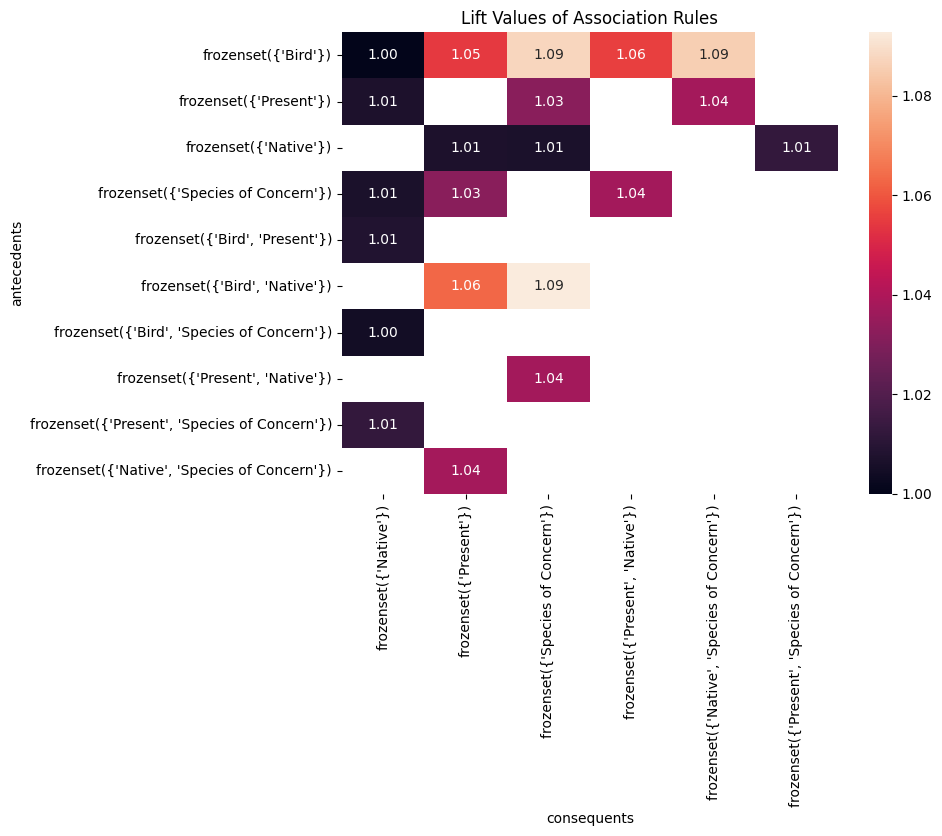

In [131]:
# Create a pivot table
pivot_table = rules_apriori.pivot(index='antecedents', columns='consequents', values='lift')

# Heatmap for lift values
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Lift Values of Association Rules')
plt.show()


# FP-Growth Algorithm

In [132]:
# Frequent pattern mining
frequent_itemsets_fpgrowth = fpgrowth(data_df, min_support=min_support,  use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fpgrowth)


Frequent Itemsets (FP-Growth):
     support                               itemsets
0   0.834052                              (Present)
1   0.832136                   (Species of Concern)
2   0.972701                               (Native)
3   0.602730                                 (Bird)
4   0.817050                      (Present, Native)
5   0.716236          (Present, Species of Concern)
6   0.814655           (Native, Species of Concern)
7   0.705220  (Present, Native, Species of Concern)
8   0.586207                         (Bird, Native)
9   0.545498             (Bird, Species of Concern)
10  0.530172                        (Bird, Present)
11  0.533046     (Bird, Native, Species of Concern)
12  0.519875                (Bird, Present, Native)


In [133]:
# Generate association rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.7)

# Print association rules
print("Association Rules (FP-Growth):")
print(rules_fpgrowth)

Association Rules (FP-Growth):
                      antecedents                    consequents  \
0                       (Present)                       (Native)   
1                        (Native)                      (Present)   
2                       (Present)           (Species of Concern)   
3            (Species of Concern)                      (Present)   
4                        (Native)           (Species of Concern)   
5            (Species of Concern)                       (Native)   
6               (Present, Native)           (Species of Concern)   
7   (Present, Species of Concern)                       (Native)   
8    (Native, Species of Concern)                      (Present)   
9                       (Present)   (Native, Species of Concern)   
10                       (Native)  (Present, Species of Concern)   
11           (Species of Concern)              (Present, Native)   
12                         (Bird)                       (Native)   
13               

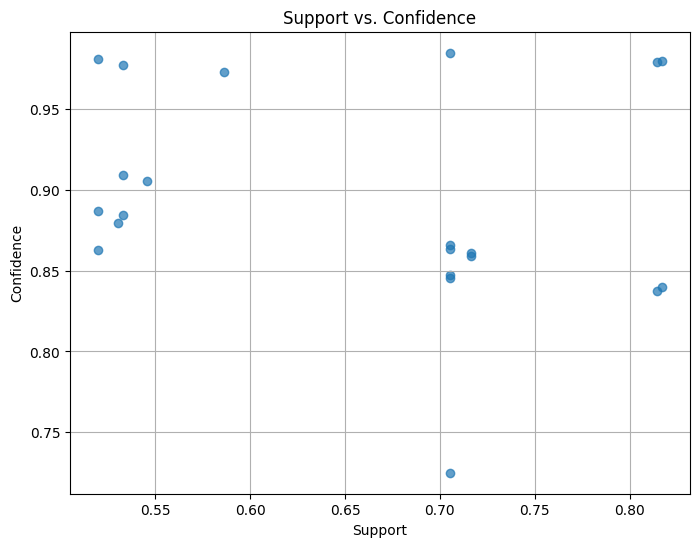

In [134]:
# Extract support and confidence values from the rules
supports = rules_fpgrowth['support'].tolist()
confidences = rules_fpgrowth['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()


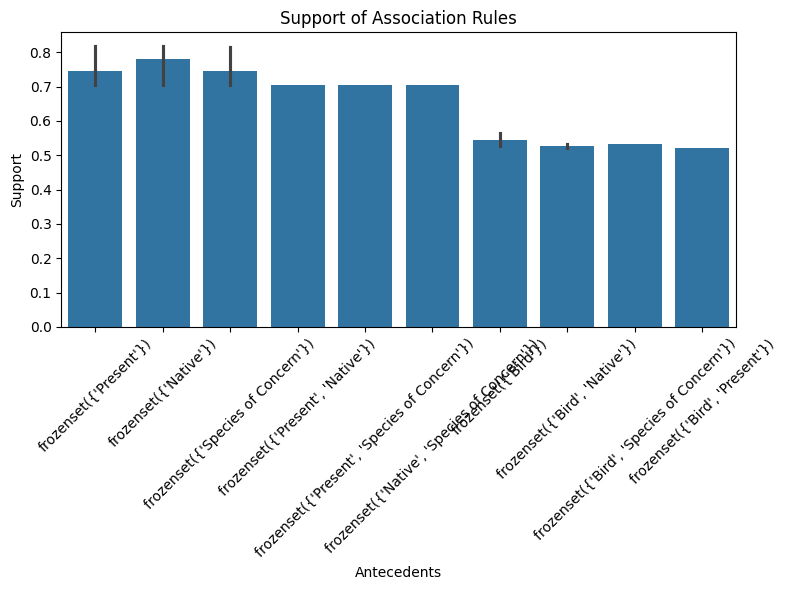

In [135]:
# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=rules_fpgrowth.antecedents, y=supports)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()


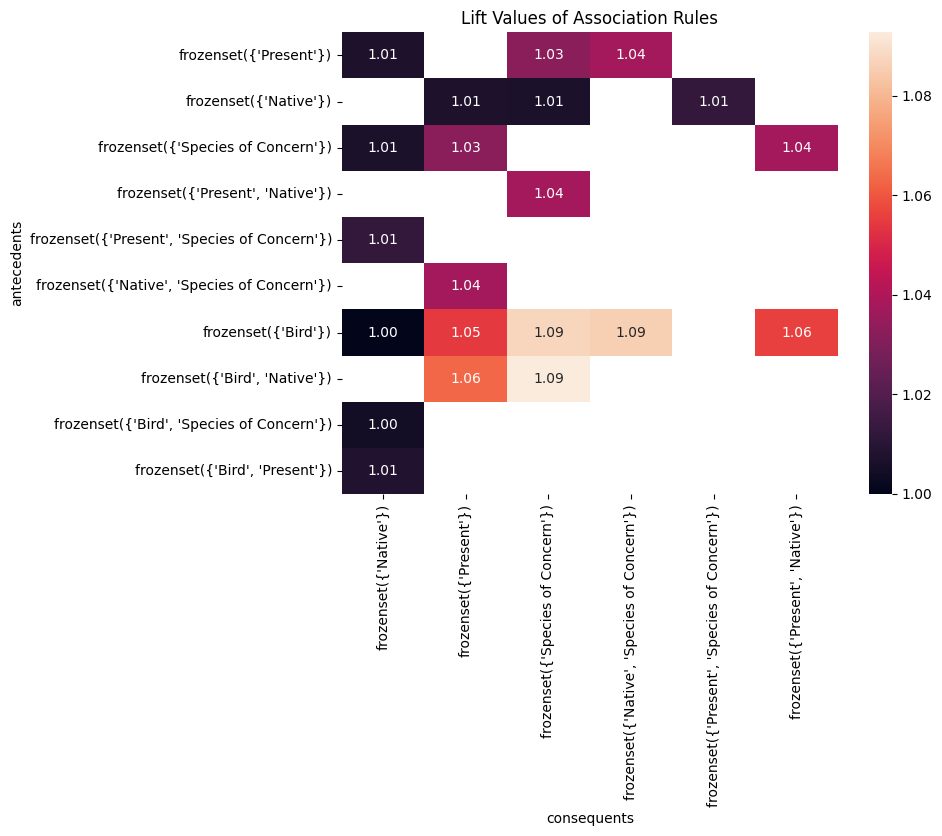

In [136]:
# Create a pivot table
pivot_table = rules_fpgrowth.pivot(index='antecedents', columns='consequents', values='lift')

# Heatmap for lift values
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Lift Values of Association Rules')
plt.show()
